<a href="https://colab.research.google.com/github/MwangiMuriuki2003/MURIUKI/blob/main/Data_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()          # pick supermarket_transactions.xlsx

Saving supermarket_transactions.xlsx to supermarket_transactions (1).xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# File now sits in /content/
df = pd.read_excel('/content/supermarket_transactions.xlsx')

df.head()

# Display DataFrame information
df.info()

# Display unique product names
print("\nUnique product names:")
print(df['product_name'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50783 entries, 0 to 50782
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      50783 non-null  int64         
 1   id              50783 non-null  object        
 2   timestamp       50783 non-null  datetime64[ns]
 3   quantity        50783 non-null  int64         
 4   product_id      50783 non-null  object        
 5   product_name    50783 non-null  object        
 6   unit_price      50783 non-null  float64       
 7   total_amount    50783 non-null  float64       
 8   store           50783 non-null  object        
 9   payment_method  50783 non-null  object        
 10  customer_id     50783 non-null  object        
 11  customer_type   50783 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 4.6+ MB

Unique product names:
['wheat' 'rye' 'oats' 'corn (maize)' 'barley' 'buckwheat' '

In [ ]:
apples_cash = (
    df.query("product_name.str.lower() == 'apples' and payment_method == 'cash'")
      .groupby('store')['quantity']
      .sum()
      .sort_values(ascending=False)
      .reset_index(name='apples_qty_cash')
)

apples_cash

,store,apples_qty_cash


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['apples_qty_cash']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'apples_qty_cash'}, axis=1)
              .sort_values('apples_qty_cash', ascending=True))
  xs = counted['apples_qty_cash']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('apples_qty_cash', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('apples_qty_cash')
_ = plt.ylabel('count()')

In [ ]:
total = apples_cash['apples_qty_cash'].sum()
print(f"Total apples paid by cash: {total}")

Total apples paid by cash: 0


In [ ]:
bakershire_non = (
    df.query("store == 'Bakershire' and customer_type == 'non-member'")
      .reset_index(drop=True)
)

bakershire_non.head()

,Unnamed: 0,id,timestamp,quantity,product_id,product_name,unit_price,total_amount,store,payment_method,customer_id,customer_type
0,111,ef644d0d-657d-4dca-b2b3-daf9d96e4254,2020-08-26 17:52:00,2,96f12c22-b227-477c-9d4f-12fff5b5c0c1,rye,2.49,4.98,Bakershire,cash,788ff5bd-2fb8-4820-a3ca-a6e3c35f7d88,non-member
1,317,ea06ee58-89fd-4d57-b112-0edf9ac3d397,2020-05-20 20:26:00,1,6aea3d67-c068-45b3-b820-30d1664762d1,corn (maize),4.29,4.29,Bakershire,contactless,97e9c455-d7bb-4f21-b8c4-17955ad02fd0,non-member
2,476,3d088690-2230-4f51-a992-c31190c2b525,2022-03-04 19:44:00,10,d74c56f0-8d8e-48d9-810c-309297e5dfde,barley,4.39,43.90,Bakershire,cash,870e8a63-be0e-4309-b250-6b96c7c29066,non-member
3,507,2228f087-0a1c-4957-9b26-eacdd13eb4f7,2020-12-24 19:47:00,7,d74c56f0-8d8e-48d9-810c-309297e5dfde,barley,4.39,30.73,Bakershire,contactless,d51c3f22-1143-47a9-963d-c035fa9cc898,non-member
4,688,5beadb9f-b879-4874-a16c-fb517f2afcdc,2020-10-17 12:42:00,10,7fc371e6-29c5-4271-ad26-31d05f76b0ab,rice,1.29,12.90,Bakershire,credit card,29fccde3-bd51-404c-99cd-be11a3b188fe,non-member


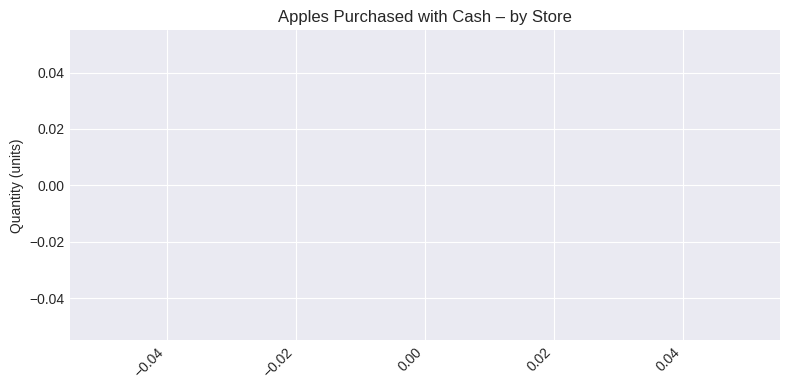

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(apples_cash['store'], apples_cash['apples_qty_cash'])
plt.title('Apples Purchased with Cash – by Store')
plt.ylabel('Quantity (units)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

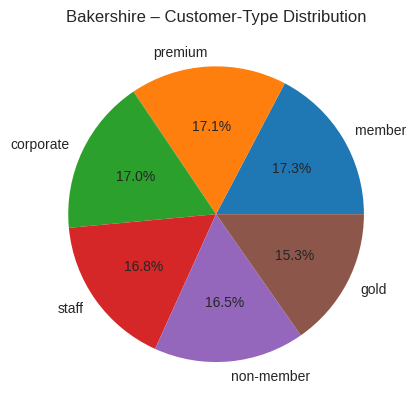

In [ ]:
mix = df.query("store == 'Bakershire'")['customer_type'].value_counts()
plt.pie(mix.values, labels=mix.index, autopct='%1.1f%%')
plt.title('Bakershire – Customer-Type Distribution')
plt.show()